In [1]:
# Import the modules
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. ETL Workflow

## Extract:

In [2]:
# Read in the CSV file as a Pandas DataFrame
file_path = Path('dataset/spotify_youtube.csv')
spotify_youtube_df = pd.read_csv(file_path)

# # Display sample data
spotify_youtube_df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## Transform:

In [3]:
# Drop unnecessary first row
spotify_youtube_df = spotify_youtube_df.drop(spotify_youtube_df.columns[0], axis=1)

# Check dataframe
spotify_youtube_df.head() 

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
# Convert column headers to lowercase for consistency and readability
spotify_youtube_df.columns = spotify_youtube_df.columns.str.lower()

# Check dataframe
spotify_youtube_df.head()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


After a cursory analysis of the data, we decided to engineer two features:

- **engagement**: Combining YouTube views and Spotify streams gives a general measure of total listener interaction with a song.
- **youtube popularity**: A ratio that will be useful in recognizing if a song was well-received on YouTube.

In [5]:
# Engineer new features
# Create engagement to measure total song activity
spotify_youtube_df['engagement'] = spotify_youtube_df['views'] + spotify_youtube_df['stream']

# Create content ratio to measure YouTube popularity for each song
spotify_youtube_df['youtube popularity'] = spotify_youtube_df['likes'] / spotify_youtube_df['views']

# Check dataframe
spotify_youtube_df.head()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,channel,views,likes,comments,description,licensed,official_video,stream,engagement,youtube popularity
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,1.733790e+09,0.008970
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,3.820954e+08,0.014985
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,7.149852e+07,0.033449
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,6.464185e+08,0.008446
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,1.235741e+09,0.010020


In [6]:
# Transform album_type, licensed, and official_video columns to numerical values for machine learning compatability
# Replace values in 'album_type' with numerical representations
spotify_youtube_df['album_type'] = spotify_youtube_df['album_type'].replace({'album': 0, 'single': 1, 'other': 2})

# Convert 'licensed' and 'official_video' from boolean to integers
# 1 = True (licensed/official video), 0 = False (not licensed/not official video)
spotify_youtube_df['licensed'] = spotify_youtube_df['licensed'].fillna(0).astype(int)
spotify_youtube_df['official_video'] = spotify_youtube_df['official_video'].fillna(0).astype(int)
spotify_youtube_df

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,channel,views,likes,comments,description,licensed,official_video,stream,engagement,youtube popularity
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,0,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1,1,1.040235e+09,1.733790e+09,0.008970
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,0,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1,1,3.100837e+08,3.820954e+08,0.014985
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),1,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1,1,6.306347e+07,7.149852e+07,0.033449
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,0,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1,1,4.346636e+08,6.464185e+08,0.008446
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,0,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1,1,6.172597e+08,1.235741e+09,0.010020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,1,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,1,1,9.227144e+06,9.298822e+06,0.015528
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,1,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,1,1,1.089818e+07,1.106292e+07,0.012256
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,1,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,1,1,6.226110e+06,6.261756e+06,0.009230
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,1,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,1,1,6.873961e+06,6.880494e+06,0.013470


In [7]:
# Summary Statistics
spotify_youtube_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,licensed,official_video,stream,engagement,youtube popularity
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,20718.000000,20718.000000,2.014200e+04,1.969200e+04,20176.000000
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,0.682498,0.758905,1.359422e+08,2.319717e+08,0.012249
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,0.465516,0.427758,2.441321e+08,4.679789e+08,0.011308
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,6.574000e+03,7.020000e+03,0.000000
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,0.000000,1.000000,1.767486e+07,2.649538e+07,0.005679
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,1.000000,1.000000,4.968298e+07,7.922365e+07,0.008783
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.000000,1.000000,1.383581e+08,2.264282e+08,0.015006
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,1.000000,1.000000,3.386520e+09,9.586248e+09,0.249204


Due to the counts of the different columns being different, we wish to eliminate any rows that may contain NaN values. This should combat any errors in our models due to NaN values.

In [8]:
spotify_youtube_df_cleaned = spotify_youtube_df.dropna(how='any')
spotify_youtube_df_cleaned

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,channel,views,likes,comments,description,licensed,official_video,stream,engagement,youtube popularity
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,0,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1,1,1.040235e+09,1.733790e+09,0.008970
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,0,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1,1,3.100837e+08,3.820954e+08,0.014985
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),1,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1,1,6.306347e+07,7.149852e+07,0.033449
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,0,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1,1,4.346636e+08,6.464185e+08,0.008446
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,0,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1,1,6.172597e+08,1.235741e+09,0.010020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,1,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,1,1,9.227144e+06,9.298822e+06,0.015528
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,1,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,1,1,1.089818e+07,1.106292e+07,0.012256
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,1,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,1,1,6.226110e+06,6.261756e+06,0.009230
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,1,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,1,1,6.873961e+06,6.880494e+06,0.013470


We check the dataframe again and see that the counts of our features now align.

In [9]:
spotify_youtube_df_cleaned.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,licensed,official_video,stream,engagement,youtube popularity
count,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,19170.000000,19170.000000,1.917000e+04,1.917000e+04,19170.000000
mean,0.621178,0.636150,5.292645,-7.615305,0.094944,0.287817,0.055476,0.191322,0.528267,120.607345,2.247612e+05,9.719768e+07,6.823531e+05,2.838656e+04,0.714763,0.793949,1.382746e+08,2.354723e+08,0.012169
std,0.165533,0.213439,3.579947,4.617605,0.104931,0.285630,0.192768,0.165217,0.244996,29.588308,1.278468e+05,2.799997e+08,1.820550e+06,1.977979e+05,0.451539,0.404478,2.477309e+08,4.728529e+08,0.011169
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,6.574000e+03,7.020000e+03,0.000000
25%,0.520000,0.510000,2.000000,-8.745000,0.035700,0.043600,0.000000,0.094100,0.338000,96.997500,1.802670e+05,2.070213e+06,2.447350e+04,5.830000e+02,0.000000,1.000000,1.786937e+07,2.692587e+07,0.005657
50%,0.639000,0.667000,5.000000,-6.504000,0.050600,0.188000,0.000002,0.125000,0.535000,119.969000,2.133210e+05,1.568959e+07,1.332770e+05,3.515500e+03,1.000000,1.000000,5.037938e+07,8.064792e+07,0.008727
75%,0.742000,0.798000,8.000000,-4.918500,0.104000,0.469000,0.000436,0.234000,0.724000,139.946000,2.519630e+05,7.369040e+07,5.423462e+05,1.494100e+04,1.000000,1.000000,1.407579e+08,2.307493e+08,0.014919
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,1.000000,1.000000,3.386520e+09,9.586248e+09,0.249204


Because of the large disparity in values between features, we have decided that we should scale the values in the millions down.

In [10]:
# Isolate compatible columns
feature_set = spotify_youtube_df_cleaned[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'views', 'likes', 'comments', 'licensed', 'official_video', 'stream', 'engagement', 'youtube popularity']]

# Initialize scaler
scaler = StandardScaler()

# Scale values
scaled_features = scaler.fit_transform(feature_set)
scaled_df = pd.DataFrame(scaled_features, columns=feature_set.columns)
scaled_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,licensed,official_video,stream,engagement,youtube popularity
0,1.189054,0.322582,0.197593,0.202774,0.782026,-0.978411,-0.275704,2.552328,0.994869,0.606730,-0.016592,2.129906,3.042315,0.715499,0.631717,0.509438,3.640982,3.168759,-0.286494
1,0.331194,0.313212,0.756275,0.389889,-0.617031,-0.703433,-0.284227,-0.877787,1.321413,-0.941151,-0.192331,-0.089953,0.217948,0.013228,0.631717,0.509438,0.693549,0.310090,0.252158
2,0.445978,1.343976,-1.199112,0.798120,-0.407363,-0.858882,-0.044488,-0.455907,0.092790,-0.425630,-0.075179,-0.317018,-0.219836,-0.106109,0.631717,0.509438,-0.303608,-0.346785,1.905326
3,0.409730,0.481882,-0.919771,0.390972,-0.657058,-1.007627,2.352753,-0.770652,0.202999,-0.006230,0.071226,0.409144,0.607647,0.135710,0.631717,0.509438,1.196446,0.869101,-0.333334
4,0.252658,0.271044,1.314958,-0.219101,0.724844,-0.919102,-0.287791,-0.735546,-0.013337,1.600189,0.908602,1.861777,3.029364,0.644834,0.631717,0.509438,1.933540,2.115445,-0.192421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,-0.236685,1.358032,-0.081748,0.275324,-0.592252,0.560822,-0.287791,-0.650202,0.529543,-1.034400,-1.017605,-0.346888,-0.374204,-0.143517,0.631717,0.509438,-0.520932,-0.478329,0.300715
19166,-0.544789,1.404884,-0.361089,1.262442,0.400812,-0.909649,-0.287791,-0.599358,0.525461,1.833936,-0.578084,-0.346556,-0.373707,-0.143517,0.631717,0.509438,-0.514186,-0.474598,0.007731
19167,-1.076421,0.908244,-0.361089,0.635910,-0.288233,-0.922603,-0.287791,-0.225901,-0.446008,1.614891,-0.687710,-0.347017,-0.374635,-0.143517,0.631717,0.509438,-0.533046,-0.484752,-0.263208
19168,-1.233494,0.613070,1.035617,0.782094,3.088374,0.238719,-0.192338,-0.504330,0.043808,1.175179,-0.910287,-0.347121,-0.374767,-0.143517,0.631717,0.509438,-0.530431,-0.483444,0.116473


## EDA: Visualizations

To identify outliers in our data, we create boxplots for each feature in our data.

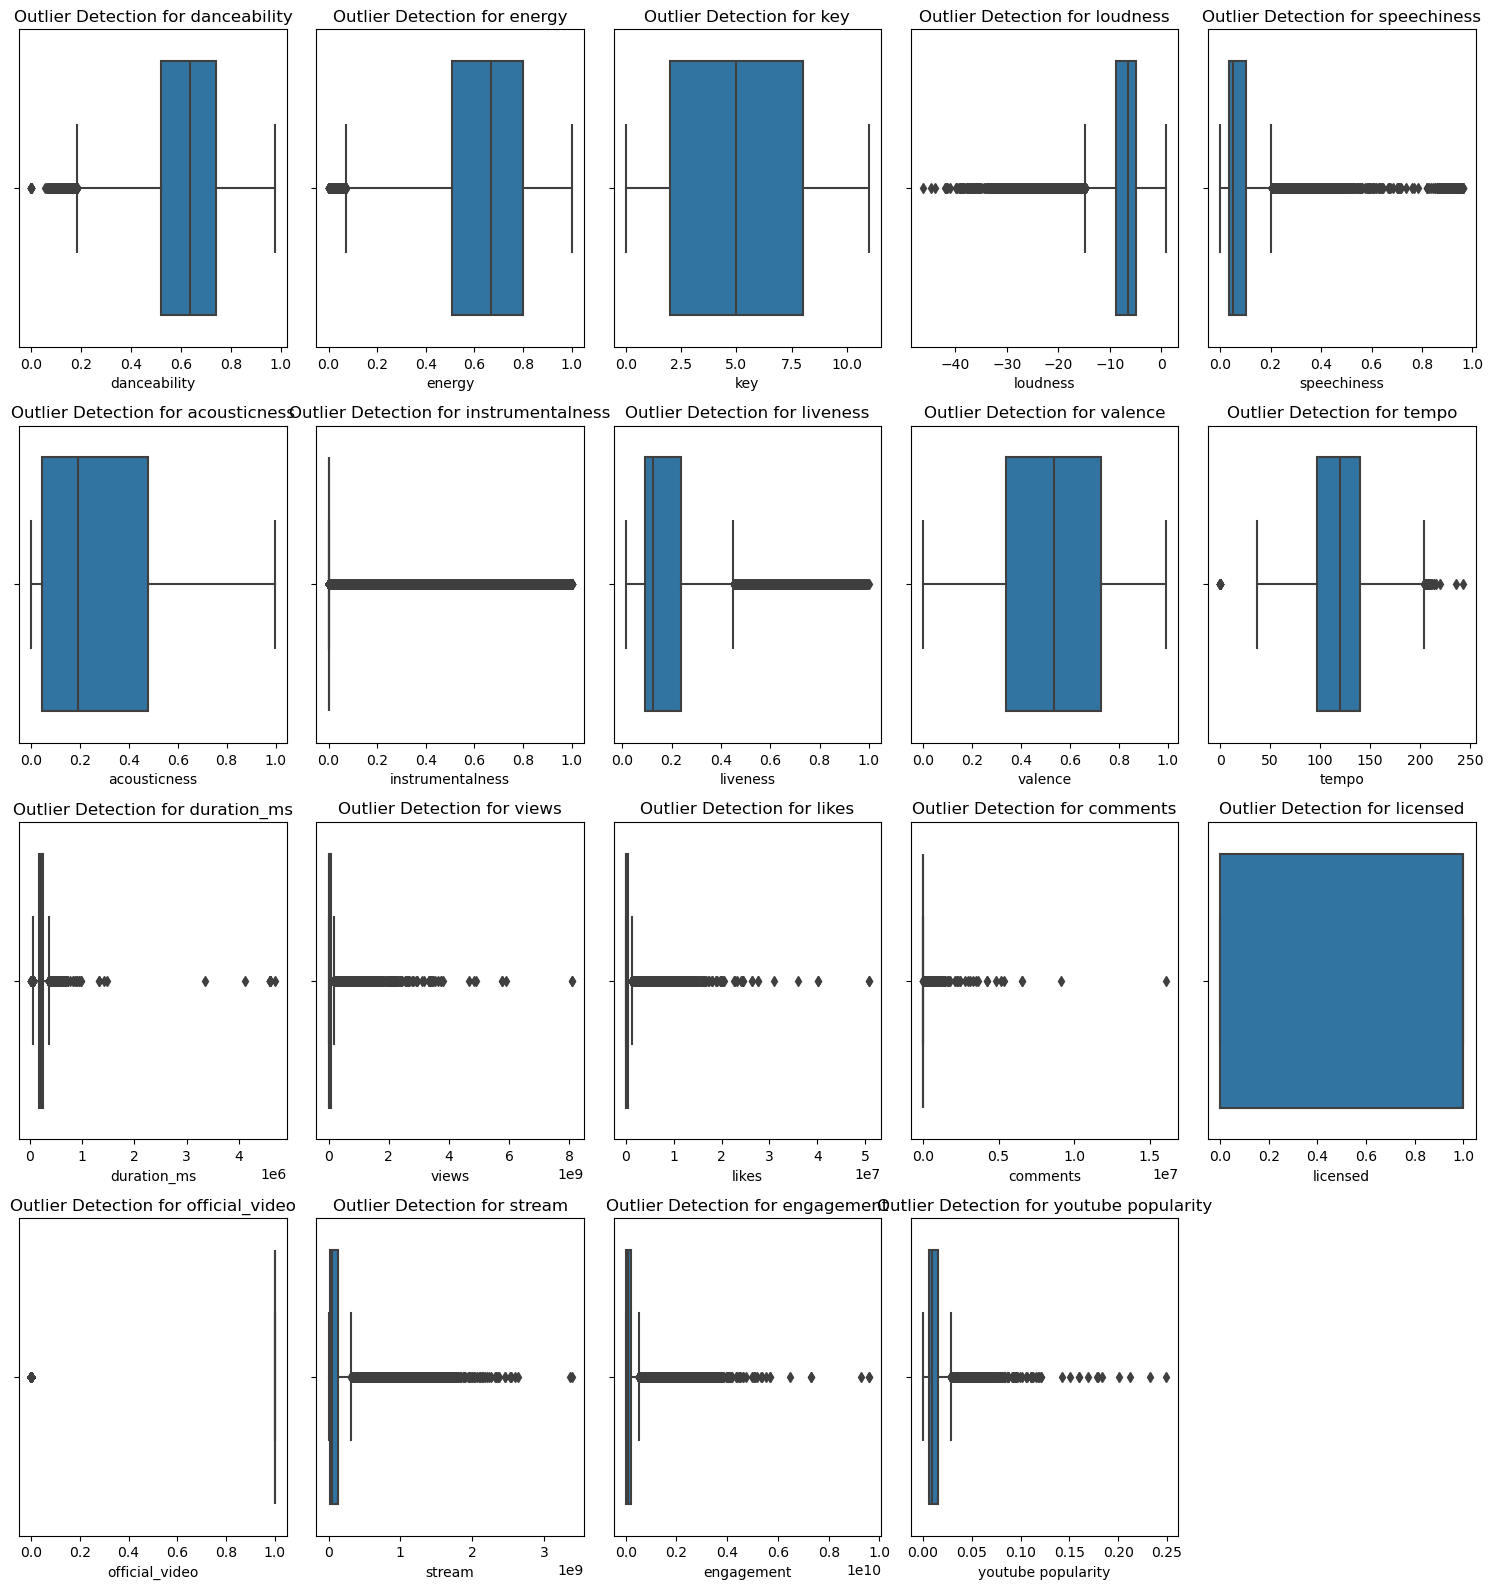

In [11]:
# Select numeric columns
numeric_columns = scaled_df.select_dtypes(include='number').columns

# Set up the grid layout: Adjust rows and columns based on the number of features
n_cols = 5  # Number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Set up the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Plot boxplots on the grid
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=spotify_youtube_df[col], ax=axes[i])
    axes[i].set_title(f'Outlier Detection for {col}')

# Hide any empty subplots if the number of features doesn't match the grid perfectly
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])
    
fig.savefig('visualizations/outlier_box_plots.png')
plt.tight_layout()
plt.show()
plt.close(fig)

To identify skew in our data, we create boxplots for each feature in our data.

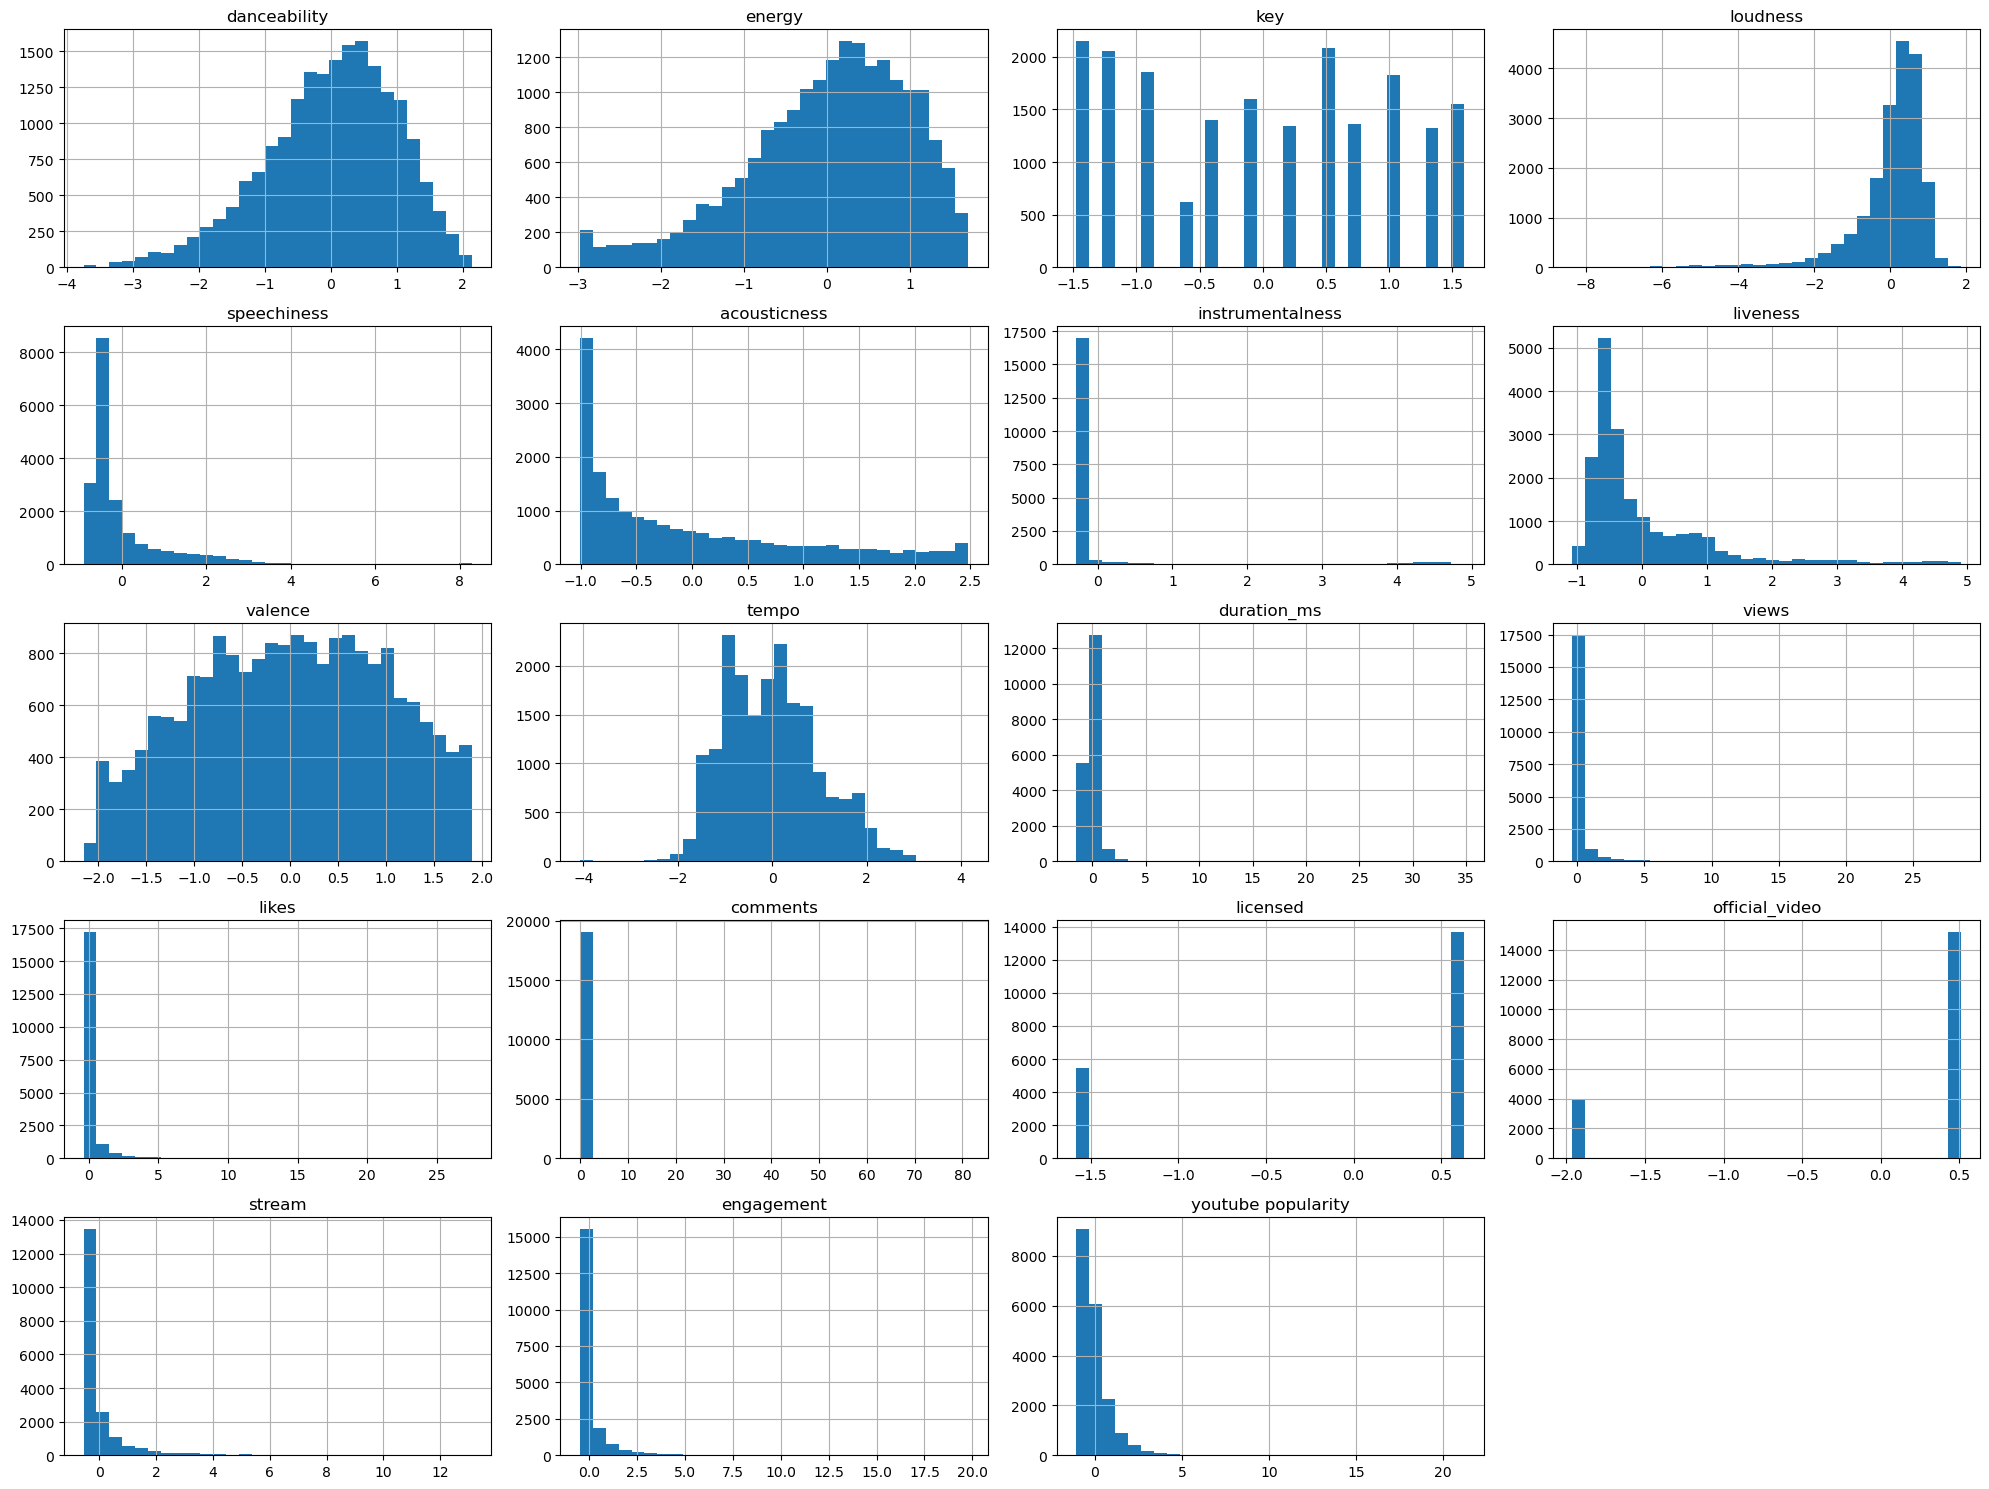

In [12]:
# Plot histograms
scaled_df.hist(bins=30, figsize=(20, 15))
fig.savefig('visualizations/histograms.png')
plt.tight_layout()
plt.show()
plt.close(fig)

### Correlation Heat Map

A correlation heat map will prove useful in identifying overfitting and multicollinearity by showing the relationships between variables. High correlations between independent variables may indicate that one can be removed or combined with others to improve model performance.

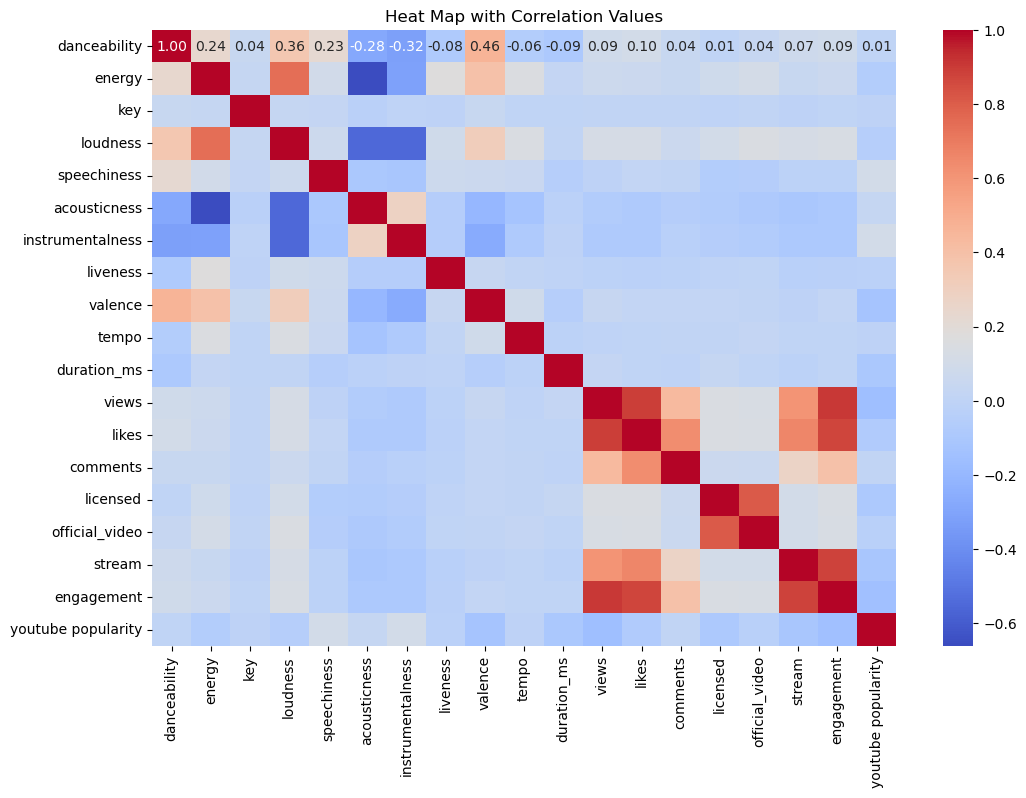

In [13]:
# Create a new figure for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap using the scaled DataFrame's correlation matrix
sns.heatmap(scaled_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Set the title for the heatmap
plt.title('Heat Map with Correlation Values')

# Save the heatmap to the visualizations folder with a higher resolution
plt.savefig('visualizations/correlation_heat_map.png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

# Close the figure to free up resources
plt.close()

### Observations
- Positive Correlations
  - energy and loudness
  - valnce and danceabiity
- Negative Correlations
  - acousticness and energy
  - acousticness and loudness
  - instrumentalness and loudness

### Conclusions
- We can combine features to avoid redundancy and overfitting:
  - energy and loudness = power
  - valence and danceability = uplift_factor

## Update to Aggregate "Duplicate" Songs
- Some songs appear appear twice with nearly identical views or stream counts and sometimes with different artist names (often due to collaborations), affecting scatter plotting, as well as modeling potentially, due to overfitting issues, etc.

In [14]:
def merge_artists_for_near_duplicates(df, tolerance=0.01):
    # Sort by track and views/streams for consistent comparison
    df_sorted = df.sort_values(by=['track', 'views', 'stream'])
    
    # Initialize an empty list to hold the processed rows
    merged_rows = []
    
    # Iterate through the sorted dataframe and compare consecutive rows
    i = 0
    while i < len(df_sorted) - 1:
        curr_row = df_sorted.iloc[i]
        next_row = df_sorted.iloc[i + 1]
        
        # Check if the track names are the same
        if curr_row['track'] == next_row['track']:
            # Calculate the percentage difference for views and streams
            views_diff = abs(curr_row['views'] - next_row['views']) / curr_row['views']
            streams_diff = abs(curr_row['stream'] - next_row['stream']) / curr_row['stream']
            
            # If both differences are below the tolerance, merge the artists
            if views_diff < tolerance and streams_diff < tolerance:
                # Merge artist names
                merged_artist = ', '.join(set([curr_row['artist'], next_row['artist']]))
                
                # Create a new row with the merged artists and the mean values
                merged_row = {
                    'track': curr_row['track'],
                    'artist': merged_artist,
                    'channel': curr_row['channel'],  # Retain the first channel
                    'stream': (curr_row['stream'] + next_row['stream']) / 2, 
                    'views': (curr_row['views'] + next_row['views']) / 2,
                    'likes': (curr_row['likes'] + next_row['likes']) / 2,
                    'danceability': (curr_row['danceability'] + next_row['danceability']) / 2,
                    'energy': (curr_row['energy'] + next_row['energy']) / 2,
                    'key': curr_row['key'], 
                    'loudness': (curr_row['loudness'] + next_row['loudness']) / 2,
                    'speechiness': (curr_row['speechiness'] + next_row['speechiness']) / 2,
                    'acousticness': (curr_row['acousticness'] + next_row['acousticness']) / 2,
                    'liveness': (curr_row['liveness'] + next_row['liveness']) / 2,
                    'instrumentalness': (curr_row['instrumentalness'] + next_row['instrumentalness']) / 2,
                    'tempo': (curr_row['tempo'] + next_row['tempo']) / 2,
                    'duration_ms': (curr_row['duration_ms'] + next_row['duration_ms']) / 2,
                    'valence': (curr_row['valence'] + next_row['valence']) / 2
                }
                
                # Append the merged row to the result list
                merged_rows.append(merged_row)
                
                # Skip the next row since it's already merged
                i += 2
            else:
                # If they are not near-duplicates, append the current row and move to the next
                merged_rows.append(curr_row.to_dict())
                i += 1
        else:
            # Append the current row if it's not a duplicate
            merged_rows.append(curr_row.to_dict())
            i += 1
    
    # Append the last row if it wasn't processed
    if i == len(df_sorted) - 1:
        merged_rows.append(df_sorted.iloc[i].to_dict())
    
    # Convert the list back to a DataFrame
    return pd.DataFrame(merged_rows)

# Apply the function to remove near-duplicates
aggregated_df = merge_artists_for_near_duplicates(spotify_youtube_df_cleaned, tolerance=0.01)


## Create scatter plot

We create a scatter plot between views and streams to identify any patterns or relationships.

Top 5 by Streams:
                                                track        stream  \
1994                                 Blinding Lights  3.386520e+09   
13255                                   Shape of You  3.362005e+09   
13789                              Someone You Loved  2.634013e+09   
17755                     rockstar (feat. 21 Savage)  2.594927e+09   
14239  Sunflower - Spider-Man: Into the Spider-Verse  2.538330e+09   

                      artist  
1994              The Weeknd  
13255             Ed Sheeran  
13789          Lewis Capaldi  
17755            Post Malone  
14239  Swae Lee, Post Malone  
Top 5 by Views:
                                     track         views  \
3769                            Despacito  8.079648e+09   
13255                        Shape of You  5.908398e+09   
13092  See You Again (feat. Charlie Puth)  5.773798e+09   
16802                   Wheels on the Bus  4.898831e+09   
16140      Uptown Funk (feat. Bruno Mars)  4.821016e+09   

  

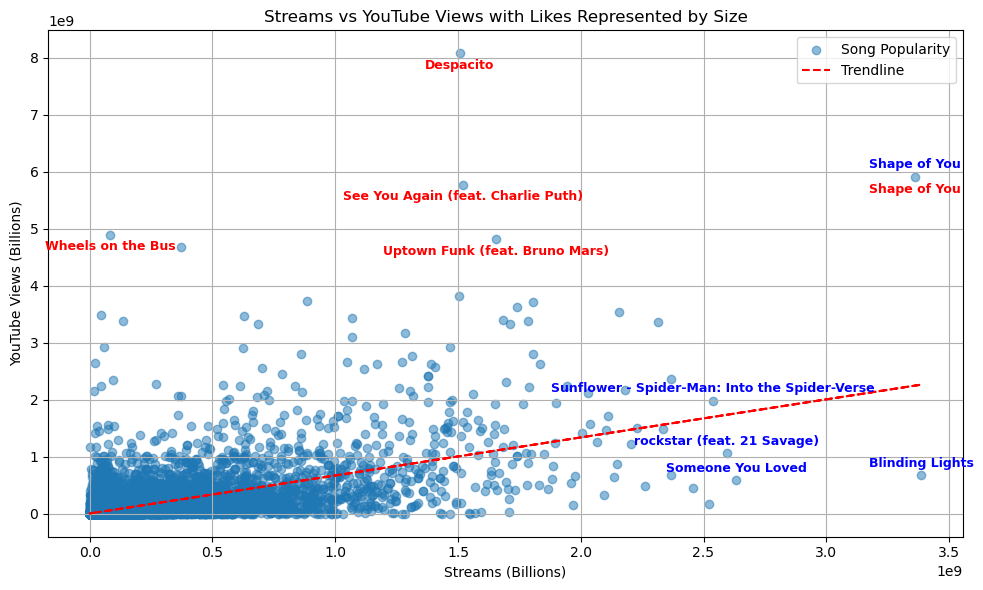

In [15]:
# Step 1: Identify the top 5 songs by 'stream' and 'views'
top_5_streams = aggregated_df.nlargest(5, 'stream')
top_5_views = aggregated_df.nlargest(5, 'views')

# Print out top 5 songs by stream and views for troubleshooting
print("Top 5 by Streams:\n", top_5_streams[['track', 'stream', 'artist']])
print("Top 5 by Views:\n", top_5_views[['track', 'views', 'artist']])

# Step 2: Create scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(aggregated_df['stream'], aggregated_df['views'], alpha=0.5, label='Song Popularity')

# Add trendline (linear regression)
z = np.polyfit(aggregated_df['stream'], aggregated_df['views'], 1)
p = np.poly1d(z)
plt.plot(aggregated_df['stream'], p(aggregated_df['stream']), "r--", label="Trendline")

# Step 3: Add bold labels for the top 5 songs by stream (centered above the points)
for i, row in top_5_streams.iterrows():
    plt.text(row['stream'], row['views'] + 0.1e9, row['track'], fontsize=9, ha='center', va='bottom', color='blue', weight='bold')

# Step 4: Add bold labels for the top 5 songs by views (centered below the points)
for i, row in top_5_views.iterrows():
    plt.text(row['stream'], row['views'] - 0.1e9, row['track'], fontsize=9, ha='center', va='top', color='red', weight='bold')

# Add labels and title
plt.xlabel('Streams (Billions)') 
plt.ylabel('YouTube Views (Billions)') 
plt.title('Streams vs YouTube Views with Likes Represented by Size')
plt.legend()

# Add grid
plt.grid(True)

# Optimize layout and show the plot
plt.tight_layout()

# Show plot
plt.show()

# Optionally, save the figure as well
plt.savefig('visualizations/streams_vs_views_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.close()

### Outliers
As we can see from this scatter plot, a few songs have view or stream counts much greater than the average song. This suggests that keeping these values could possibly skew the data. To correct this, we can either remove the outliers, or log transform the appropriate features.

### New direction
This plot helps us realize that analyzing YouTube data with statistics gathered from Spotify will most likely lead to inaccurate findings. Youtube videos have a visual factor that greatly plays into their success. We decide to cut the Youtube data from our analysis.

## Most Popular Channels (by stream)
- Graph the most popular channels to understand any genre insights

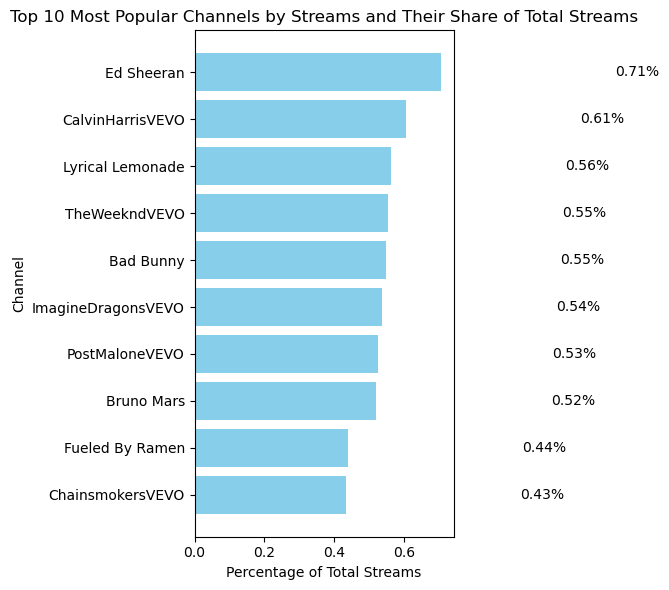

In [16]:
# Assuming 'aggregated_df' is your DataFrame containing 'channel' and 'streams' columns
# First, group by channel and sum their total streams
channel_streams = aggregated_df.groupby('channel')['stream'].sum().reset_index()

# Sort the channels by the total streams in descending order and select the top 10
top_10_channels = channel_streams.sort_values(by='stream', ascending=False).head(10)

# Calculate the percentage of total streams for each of the top 10 channels
total_streams = aggregated_df['stream'].sum()
top_10_channels['percent_of_total'] = (top_10_channels['stream'] / total_streams) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_channels['channel'], top_10_channels['percent_of_total'], color='skyblue')
plt.xlabel('Percentage of Total Streams')
plt.ylabel('Channel')
plt.title('Top 10 Most Popular Channels by Streams and Their Share of Total Streams')
plt.gca().invert_yaxis()  # Invert y-axis so that the highest value is at the top

# Add percentage labels to each bar
for index, value in enumerate(top_10_channels['percent_of_total']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

# Optimize the layout
plt.tight_layout()

# Save the plot to the visualizations folder
plt.savefig('visualizations/top_10_channels_by_streams.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Close the figure to free up memory
plt.close()


## Most Popular Songs (Imagine Dragons Example)
- Graph the most popular songs from one channel to understand any genre insights

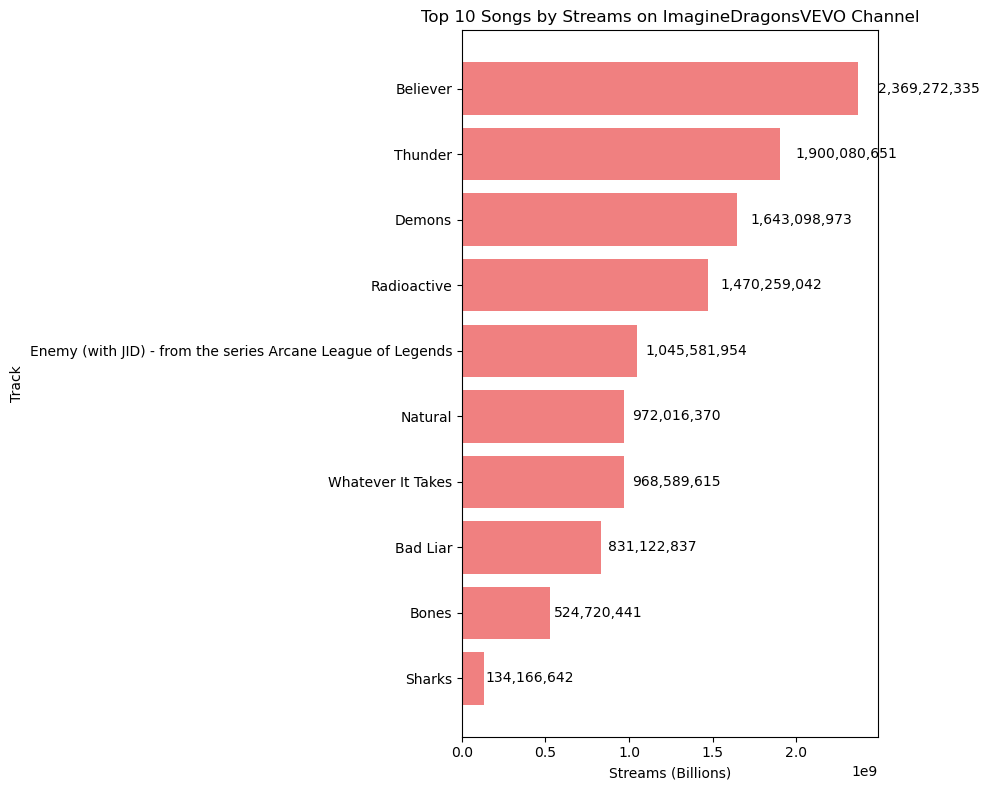

In [17]:
# Assuming 'aggregated_df' is your DataFrame containing 'channel', 'track', and 'stream' columns

# Step 1: Find the most popular channel (by total streams)
channel_streams = aggregated_df.groupby('channel')['stream'].sum().reset_index()
popular_channel = channel_streams.sort_values(by='stream', ascending=False).iloc[5]['channel']

# Step 2: Filter songs from the most popular channel
songs_in_popular_channel = aggregated_df[aggregated_df['channel'] == popular_channel]

# Step 3: Sort songs by streams and select top 10
top_10_songs = songs_in_popular_channel[['track', 'stream']].drop_duplicates().sort_values(by='stream', ascending=False).head(10)

# Step 4: Plot the bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_10_songs['track'], top_10_songs['stream'], color='lightcoral')
plt.xlabel('Streams (Billions)')
plt.ylabel('Track')
plt.title(f'Top 10 Songs by Streams on {popular_channel} Channel')
plt.gca().invert_yaxis()  # Invert y-axis so that the highest value is at the top

# Add stream labels to each bar
for index, value in enumerate(top_10_songs['stream']):
    plt.text(value + 0.05 * value, index, f"{value:,.0f}", va='center')

# Optimize layout
plt.tight_layout()

# Save the plot to the visualizations folder
plt.savefig(f'visualizations/top_10_songs_{popular_channel}_channel.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Close the figure to free up memory
plt.close()

## Most Popular Artists (by stream)
- Graph the most popular channels to understand any genre insights

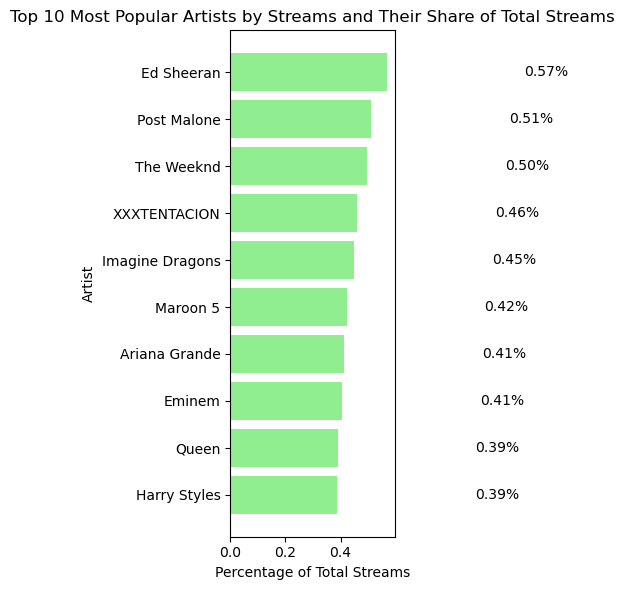

In [18]:
# Assuming 'aggregated_df' is your DataFrame containing 'artist' and 'stream' columns
# First, group by artist and sum their total streams
artist_streams = aggregated_df.groupby('artist')['stream'].sum().reset_index()

# Sort the artists by the total streams in descending order and select the top 10
top_10_artists = artist_streams.sort_values(by='stream', ascending=False).head(10)

# Calculate the percentage of total streams for each of the top 10 artists
total_streams = aggregated_df['stream'].sum()
top_10_artists['percent_of_total'] = (top_10_artists['stream'] / total_streams) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_artists['artist'], top_10_artists['percent_of_total'], color='lightgreen')
plt.xlabel('Percentage of Total Streams')
plt.ylabel('Artist')
plt.title('Top 10 Most Popular Artists by Streams and Their Share of Total Streams')
plt.gca().invert_yaxis()  # Invert y-axis so that the highest value is at the top

# Add percentage labels to each bar
for index, value in enumerate(top_10_artists['percent_of_total']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

# Optimize layout
plt.tight_layout()

# Save the plot to the visualizations folder
plt.savefig(f'visualizations/top_10_artists_streams.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Close the figure to free up memory
plt.close()

## Feature Engineering

Creating new features `power` and `uplift_factor` as averages of existing features.
(After testing and using these features, we learn they do not help accuracy at all)

In [19]:
# Create new features
spotify_youtube_df_cleaned['power'] = (spotify_youtube_df_cleaned['energy'] + spotify_youtube_df_cleaned['loudness']) / 2
spotify_youtube_df_cleaned['uplift_factor'] = (spotify_youtube_df_cleaned['valence'] + spotify_youtube_df_cleaned['danceability']) / 2

C:\Users\drpon\AppData\Local\Temp\ipykernel_17380\2813113739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_youtube_df_cleaned['power'] = (spotify_youtube_df_cleaned['energy'] + spotify_youtube_df_cleaned['loudness']) / 2
C:\Users\drpon\AppData\Local\Temp\ipykernel_17380\2813113739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_youtube_df_cleaned['uplift_factor'] = (spotify_youtube_df_cleaned['valence'] + spotify_youtube_df_cleaned['danceability']) / 2


## "Deduping" the scaled df
- Deduplicate the 'scaled' dataframe to avoid potential overfitting 

In [20]:
# Step 1: Define a function to find and merge near-duplicate rows based on tolerances for views and streams
def merge_near_duplicates(df, tolerance=0.01):
    df_sorted = df.sort_values(by=['views', 'stream'])  # Sort by 'views' and 'stream' for consistent comparison

    merged_rows = []  # List to hold processed rows
    i = 0

    while i < len(df_sorted) - 1:
        curr_row = df_sorted.iloc[i]
        next_row = df_sorted.iloc[i + 1]

        # Check if the rows are near-duplicates based on the 'views' and 'stream' columns
        views_diff = abs(curr_row['views'] - next_row['views']) / curr_row['views']
        streams_diff = abs(curr_row['stream'] - next_row['stream']) / curr_row['stream']

        # If both differences are below the tolerance, merge the rows
        if views_diff < tolerance and streams_diff < tolerance:
            # Take the mean of numerical columns
            merged_row = {
                'danceability': (curr_row['danceability'] + next_row['danceability']) / 2,
                'energy': (curr_row['energy'] + next_row['energy']) / 2,
                'key': curr_row['key'],  # Assuming the key is the same for both rows
                'loudness': (curr_row['loudness'] + next_row['loudness']) / 2,
                'speechiness': (curr_row['speechiness'] + next_row['speechiness']) / 2,
                'acousticness': (curr_row['acousticness'] + next_row['acousticness']) / 2,
                'instrumentalness': (curr_row['instrumentalness'] + next_row['instrumentalness']) / 2,
                'liveness': (curr_row['liveness'] + next_row['liveness']) / 2,
                'valence': (curr_row['valence'] + next_row['valence']) / 2,
                'tempo': (curr_row['tempo'] + next_row['tempo']) / 2,
                'duration_ms': (curr_row['duration_ms'] + next_row['duration_ms']) / 2,
                'views': (curr_row['views'] + next_row['views']) / 2,
                'likes': (curr_row['likes'] + next_row['likes']) / 2,
                'comments': (curr_row['comments'] + next_row['comments']) / 2,
                'licensed': curr_row['licensed'],
                'official_video': curr_row['official_video'],
                'stream': (curr_row['stream'] + next_row['stream']) / 2,
                'engagement': (curr_row['engagement'] + next_row['engagement']) / 2,
                'youtube popularity': (curr_row['youtube popularity'] + next_row['youtube popularity']) / 2
            }
            merged_rows.append(merged_row)
            i += 2  # Skip the next row since it was merged
        else:
            merged_rows.append(curr_row.to_dict())
            i += 1

    # Append the last row if it wasn't processed
    if i == len(df_sorted) - 1:
        merged_rows.append(df_sorted.iloc[i].to_dict())

    return pd.DataFrame(merged_rows)

# Step 2: Apply the function to deduplicate and aggregate the data
dedup_df = merge_near_duplicates(scaled_df, tolerance=0.01)

# Models

## Model 1: Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

variables = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
             'liveness', 'instrumentalness', 'tempo', 'valence', 'duration_ms']

# Define features and target
X = dedup_df[variables]
y = dedup_df['stream']  # Predict Spotify streams

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train regularized linear regression (Ridge)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = ridge_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.262852707062735
R-squared: 0.11871578812434547


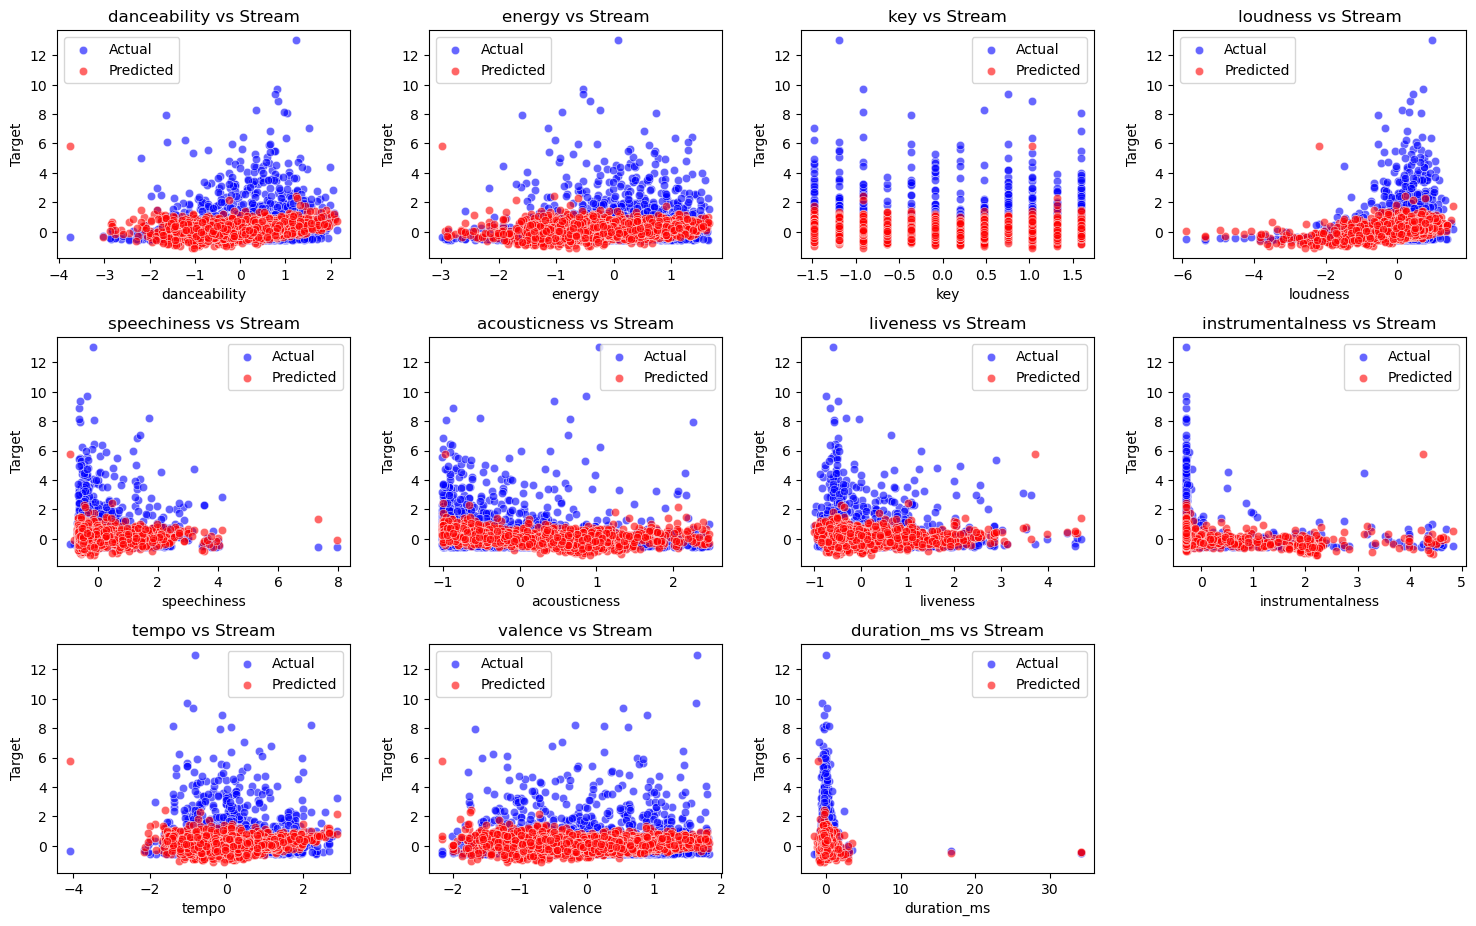

In [22]:
# Convert scaled X_test back to a DataFrame with original feature names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Set up figure size
plt.figure(figsize=(15, 12))

# Define the features you want to plot against the target variable
features = X.columns
target = 'stream'

# Create subplots for each feature
num_features = len(features)
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)  # Adjust grid size depending on number of features (up to 16 plots)
    
    # Scatter plot for actual values (y_test)
    sns.scatterplot(x=X_test_df[feature], y=y_test, color='blue', label='Actual', alpha=0.6)
    
    # Scatter plot for predicted values (y_pred)
    sns.scatterplot(x=X_test_df[feature], y=y_pred, color='red', label='Predicted', alpha=0.6)
    
    # Set title and labels
    plt.title(f'{feature} vs {target.capitalize()}')
    plt.xlabel(feature)
    plt.ylabel('Target')
    
    # Add a legend to distinguish actual vs. predicted
    plt.legend()

# Adjust layout so that all subplots fit neatly
plt.tight_layout()

# Save the plot to the visualizations folder
plt.savefig('visualizations/actual_vs_predicted_scatterplots.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

# Close the figure to free up memory
plt.close()

## Model 2: Random Forest

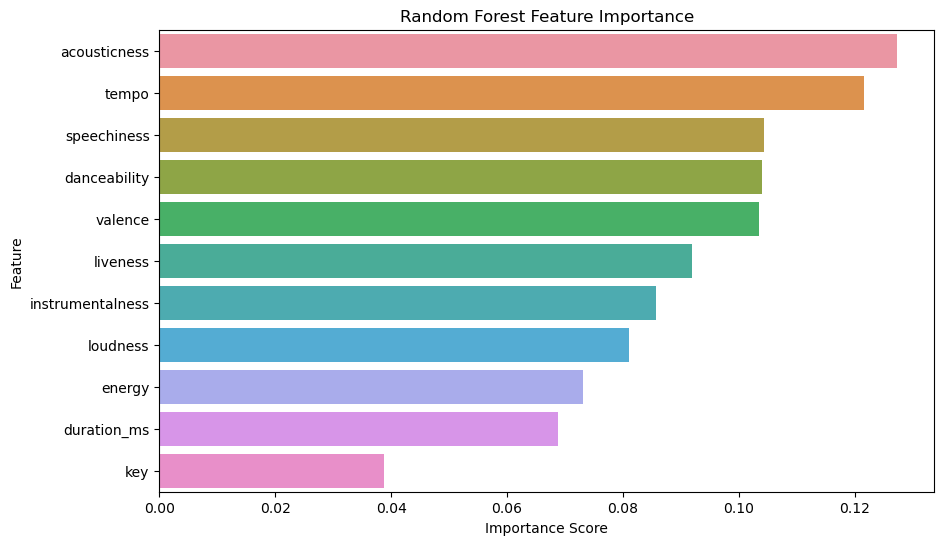

Mean Squared Error (MSE): 1.1954
R² Score: 0.1658


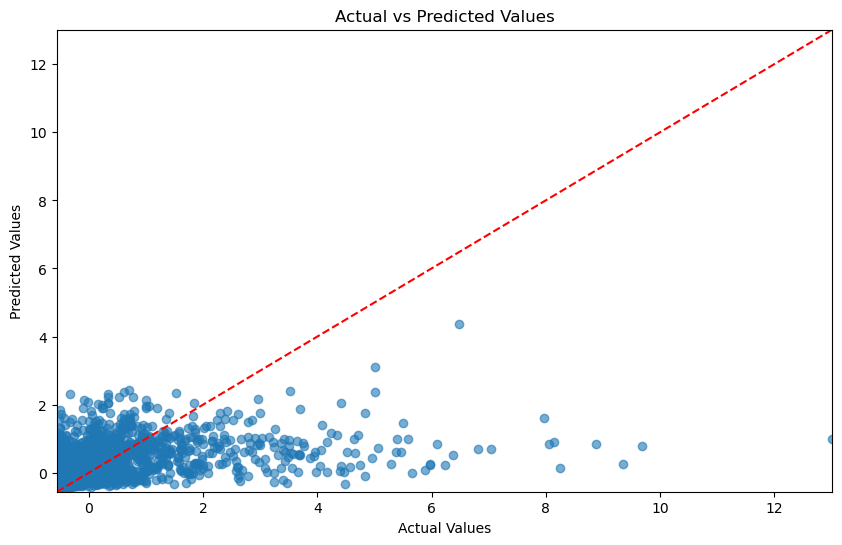

c:\Users\drpon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


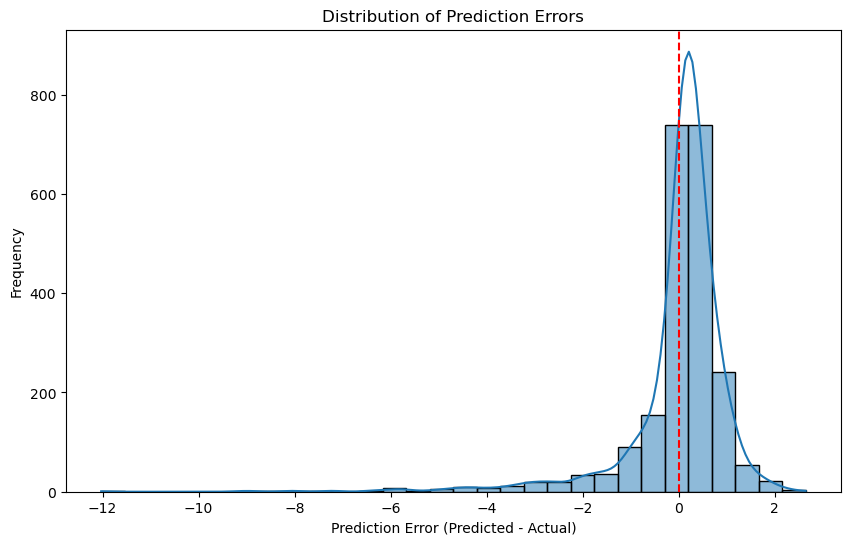

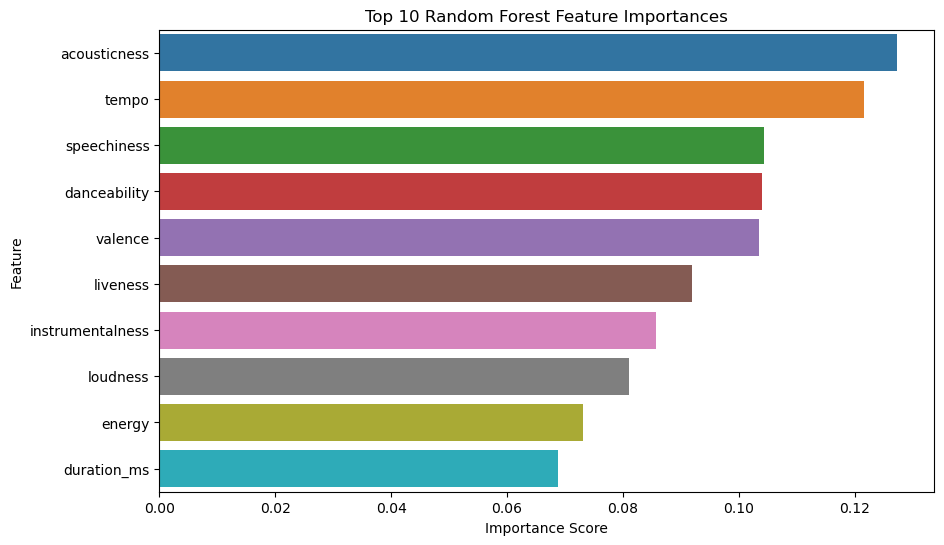

In [23]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold the feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
# Save the feature importance plot
plt.savefig('visualizations/random_forest_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # Close the figure

# Step 1: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 2: Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 3: Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
# Save the actual vs predicted plot
plt.savefig('visualizations/actual_vs_predicted_values.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Step 4: Analyze predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_pred - y_test
})

# Visualizing the prediction errors
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['Difference'], bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
# Save the prediction errors plot
plt.savefig('visualizations/distribution_of_prediction_errors.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Step 5: Optional - Feature Importance Analysis
# Display the top N most important features
top_n = 10
top_importances = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_importances)
plt.title(f'Top {top_n} Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
# Save the top N feature importance plot
plt.savefig(f'visualizations/top_{top_n}_random_forest_feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [24]:
# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Scoring metric
                           cv=5,  # Cross-validation splitting strategy
                           verbose=2,  # Controls the verbosity: the higher, the more messages
                           n_jobs=-1)  # Use all available cores

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)  # Negate because we used neg_mean_squared_error

# Evaluate on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Test Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Test R² Score: {r2_best:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\drpon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
468 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\drpon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\drpon\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\drpon\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\drpon\anaconda3\Lib\site-packa

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (MSE): 0.9677148307280113
Test Mean Squared Error (MSE): 1.1811
Test R² Score: 0.1758


## Predicting Songs with low streams
* Based on the assumption that poor performance is less correlated with time.

In [25]:
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Calculate the 10th percentile of the 'stream' column to set the threshold
threshold = dedup_df['stream'].quantile(0.10)
unscaled_threshold = aggregated_df['stream'].quantile(0.10)

# Step 2: Create a new binary column 'below_threshold' to classify tracks based on the threshold
dedup_df['below_threshold'] = dedup_df['stream'] < threshold

# Step 3: Separate majority (above threshold) and minority (below threshold) classes
df_majority = dedup_df[dedup_df['below_threshold'] == False]  # Class 0 (above threshold)
df_minority = dedup_df[dedup_df['below_threshold'] == True]   # Class 1 (below threshold)

# Step 4: Oversample the minority class to match the majority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),    # Match number of majority class samples
                                   random_state=42)  # Reproducible results

# Step 5: Combine majority class with the oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Step 6: Verify the new class distribution
print(df_oversampled['below_threshold'].value_counts())

# Step 7: Define features and target using the oversampled data
X = df_oversampled[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'liveness', 'instrumentalness', 'tempo', 'duration_ms', 'valence']]  # Example features
y = df_oversampled['below_threshold']

# Step 8: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 10: Get predicted probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (below threshold)

# Step 11: Apply a custom threshold (e.g., 0.3) 
custom_threshold = 0.475
y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)  # Convert probabilities to 0/1 based on the custom threshold

# Step 12: Print the threshold for reference
print(f"The threshold (10th percentile) for streams is: {unscaled_threshold}")

# Step 13: Evaluate the model with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy with custom threshold: {accuracy_custom:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_custom))

# Optional: Print the custom threshold for reference
print(f"The custom threshold used for classification is: {custom_threshold}")

below_threshold
False    9913
True     9913
Name: count, dtype: int64
The threshold (10th percentile) for streams is: 5836670.400000003
Accuracy with custom threshold: 0.64
Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.64      0.64      1993
        True       0.63      0.63      0.63      1973

    accuracy                           0.64      3966
   macro avg       0.64      0.64      0.64      3966
weighted avg       0.64      0.64      0.64      3966

The custom threshold used for classification is: 0.475


## RFE with Logistic Regression
- Predicting bottom-quantile songs.

In [26]:
# Define the variables (features) you want to use
variables = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
             'liveness', 'instrumentalness', 'tempo', 'valence', 'duration_ms']

def logistic_regression_with_rfe_quantile(dedup_df, variables, quantile_threshold=0.10, custom_threshold=0.5, n_features_to_select=4):
    # Step 1: Calculate the quantile threshold for 'stream'
    threshold = dedup_df['stream'].quantile(quantile_threshold)
    
    # Step 2: Create a new binary column 'below_threshold' to classify tracks based on the quantile threshold
    dedup_df['below_threshold'] = dedup_df['stream'] < threshold
    
    # Step 3: Define features (X) and target (y)
    X = dedup_df[variables]  # Use the specified list of variables
    y = dedup_df['below_threshold']
    
    # Step 4: Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    # Step 5: Initialize logistic regression model with class_weight='balanced'
    logreg = LogisticRegression(class_weight='balanced')

    # Step 6: Use RFE to select the best features
    rfe = RFE(logreg, n_features_to_select=n_features_to_select)  # Select the number of best features (adjust as needed)
    rfe = rfe.fit(X_train, y_train)

    # Step 8: Check which features were selected
    selected_features = X.columns[rfe.support_]
    print(f"Selected Features: {selected_features}")

    # Step 9: Train logistic regression with selected features
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    logreg.fit(X_train_rfe, y_train)

    # Step 10: Get predicted probabilities for the positive class (below_threshold == True)
    y_pred_proba = logreg.predict_proba(X_test_rfe)[:, 1]  # This gives probabilities for class 1

    # Step 11: Apply a custom threshold (e.g., 0.25)
    y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)  # Convert probabilities to 0/1 based on custom threshold

    # Step 12: Evaluate the performance with the custom threshold
    accuracy_custom = accuracy_score(y_test, y_pred_custom)
    print(f"Accuracy with custom threshold: {accuracy_custom:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred_custom))
    
    return accuracy_custom, selected_features, custom_threshold, \
    y_pred_proba, y_test, y_pred_custom, rfe, logreg, X

# Example usage for bottom decile (10th percentile) with custom threshold 0.6
accuracy, features, custom_threshold_used, y_pred_proba, y_test, y_pred_custom, rfe, logreg, X = \
    logistic_regression_with_rfe_quantile(dedup_df, variables, quantile_threshold=0.10, custom_threshold=0.6, n_features_to_select=4)

# Example usage for bottom quintile (20th percentile) with custom threshold 0.65
accuracy, features, custom_threshold_used, y_pred_proba, y_test, y_pred_custom, rfe, logreg, X = \
    logistic_regression_with_rfe_quantile(dedup_df, variables, quantile_threshold=0.10, custom_threshold=0.65, n_features_to_select=5)

Selected Features: Index(['energy', 'loudness', 'acousticness', 'duration_ms'], dtype='object')
Accuracy with custom threshold: 0.85
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.92      0.91      1968
        True       0.27      0.26      0.27       235

    accuracy                           0.85      2203
   macro avg       0.59      0.59      0.59      2203
weighted avg       0.84      0.85      0.84      2203

Selected Features: Index(['energy', 'loudness', 'speechiness', 'acousticness', 'duration_ms'], dtype='object')
Accuracy with custom threshold: 0.86
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.95      0.93      1968
        True       0.28      0.18      0.22       235

    accuracy                           0.86      2203
   macro avg       0.59      0.56      0.57      2203
weighted avg       0.84      0.86      0.85      2203



## RFE with Logistic Regression
- Predicting top-quantile songs.

In [27]:
# Define the variables (features) you want to use
variables = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
             'liveness', 'instrumentalness', 'tempo', 'valence', 'duration_ms']

def logistic_regression_with_rfe_quantile(dedup_df, variables, quantile_threshold=0.90, custom_threshold=0.5, n_features_to_select=4):
    # Step 1: Calculate the quantile threshold for 'stream'
    threshold = dedup_df['stream'].quantile(quantile_threshold)
    
    # Step 2: Create a new binary column 'above_threshold' to classify tracks based on the quantile threshold
    dedup_df['above_threshold'] = dedup_df['stream'] >= threshold  # Changed to "greater than or equal" for top decile
    
    # Step 3: Define features (X) and target (y)
    X = dedup_df[variables]  # Use the specified list of variables
    y = dedup_df['above_threshold']  # Target is now 'above_threshold'
    
    # Step 4: Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 5: Scale the features
    #scaler = StandardScaler()
    #X_train_scaled = scaler.fit_transform(X_train)
    #X_test_scaled = scaler.transform(X_test)
    
    # Step 6: Initialize logistic regression model with class_weight='balanced'
    logreg = LogisticRegression(class_weight='balanced')

    # Step 7: Use RFE to select the best features
    rfe = RFE(logreg, n_features_to_select=n_features_to_select)  # Select the number of best features (adjust as needed)
    rfe = rfe.fit(X_train, y_train)

    # Step 8: Check which features were selected
    selected_features = X.columns[rfe.support_]
    print(f"Selected Features: {selected_features}")

    # Step 9: Train logistic regression with selected features
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    logreg.fit(X_train_rfe, y_train)

    # Step 10: Get predicted probabilities for the positive class (above_threshold == True)
    y_pred_proba = logreg.predict_proba(X_test_rfe)[:, 1]  # This gives probabilities for class 1

    # Step 11: Apply a custom threshold (e.g., 0.25)
    y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)  # Convert probabilities to 0/1 based on custom threshold

    # Step 12: Evaluate the performance with the custom threshold
    accuracy_custom = accuracy_score(y_test, y_pred_custom)
    print(f"Accuracy with custom threshold: {accuracy_custom:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred_custom))
    
    return accuracy_custom, selected_features, custom_threshold, \
        y_pred_proba, y_test, y_pred_custom, rfe, logreg, X

# Example usage for top decile (90th percentile) with custom threshold 0.65
accuracy, features, custom_threshold_used, y_pred_proba, y_test, y_pred_custom, rfe, logreg, X = \
    logistic_regression_with_rfe_quantile(dedup_df, variables, quantile_threshold=0.90, custom_threshold=0.65, n_features_to_select=4)

# Example usage for top quintile (80th percentile) with custom threshold 0.6
accuracy, features, custom_threshold_used, y_pred_proba, y_test, y_pred_custom, rfe, logreg, X = \
    logistic_regression_with_rfe_quantile(dedup_df, variables, quantile_threshold=0.875, custom_threshold=0.615, n_features_to_select=5)

Selected Features: Index(['energy', 'loudness', 'acousticness', 'instrumentalness'], dtype='object')
Accuracy with custom threshold: 0.86
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.94      0.92      1958
        True       0.29      0.19      0.23       245

    accuracy                           0.86      2203
   macro avg       0.59      0.56      0.57      2203
weighted avg       0.83      0.86      0.84      2203

Selected Features: Index(['energy', 'loudness', 'acousticness', 'instrumentalness', 'valence'], dtype='object')
Accuracy with custom threshold: 0.82
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.90      0.89      1902
        True       0.31      0.29      0.30       301

    accuracy                           0.82      2203
   macro avg       0.60      0.60      0.60      2203
weighted avg       0.81      0.82      0.81      2203



            Feature  Coefficient
1          loudness     0.798852
4           valence    -0.153022
3  instrumentalness    -0.449205
2      acousticness    -0.511732
0            energy    -0.608028


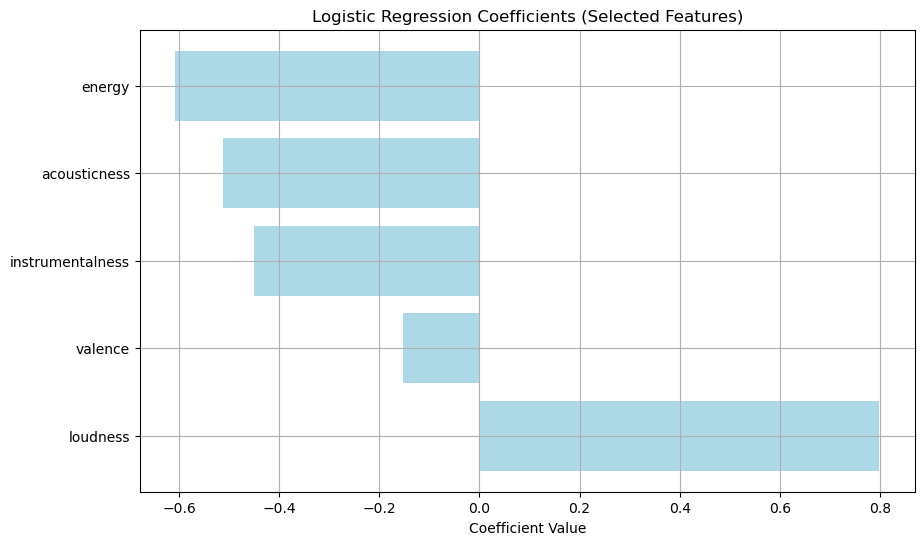

In [28]:
# Step 1: Get the coefficients of the logistic regression model for the selected features
coefficients = logreg.coef_[0]  # Coefficients for the selected features

# Step 2: Match the selected features to their coefficients
selected_features = X.columns[rfe.support_]  # Features selected by RFE

# Step 3: No need to filter coefficients again, because they already match the selected features
coefficients_rfe = coefficients  # Coefficients are already for selected features

# Step 4: Create a DataFrame to display the features and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients_rfe  # Use the filtered coefficients
})

# Step 5: Sort by absolute coefficient value for easy interpretation
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
print(coef_df)

# Plot the coefficients as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='lightblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients (Selected Features)')
plt.grid(True)

# Save the coefficient plot
plt.savefig('visualizations/logistic_regression_coefficients.png', dpi=300, bbox_inches='tight')

plt.show()
plt.close()

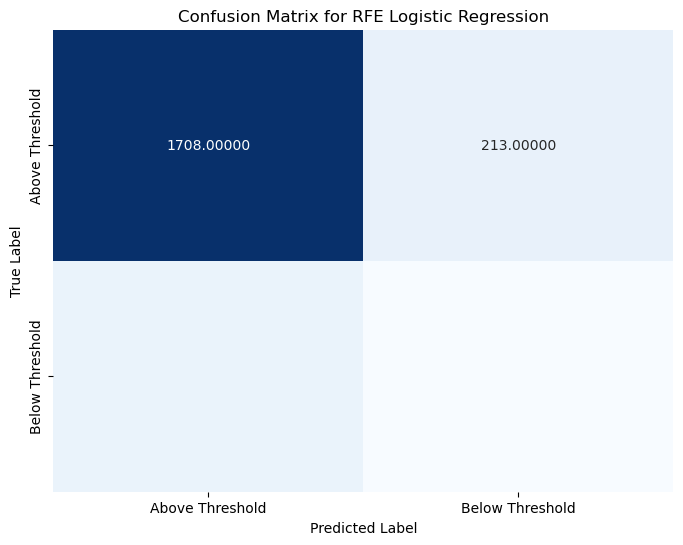

0.615
[0 0 0 ... 0 1 1]
[0.49692646 0.37573353 0.25969762 0.56468412 0.55860808 0.43291194
 0.28775682 0.50124056 0.45374829 0.48817835 0.52508581 0.61118981
 0.50538745 0.55970077 0.42255028 0.46061619 0.56696908 0.09165808
 0.45520003 0.38213613 0.38271946 0.48697638 0.66626817 0.55767563
 0.23721753]
8297     False
10760    False
3501     False
4463     False
8829     False
9667     False
2865     False
8990     False
4343     False
9844     False
303      False
3154     False
8620     False
408      False
1183     False
7864     False
7089     False
592      False
5859      True
8877     False
Name: above_threshold, dtype: bool
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<function confusion_matrix at 0x0000022B76D0F560>


In [29]:
# Step 1: Predict class labels using the custom threshold
#y_pred_custom = (y_pred_proba >= custom_threshold_used).astype(int)

# Step 2: Compute confusion matrix
conf_matrix = confusion_matrix(y_pred_custom, y_test)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.5f', cmap='Blues', cbar=False, 
            xticklabels=['Above Threshold', 'Below Threshold'], 
            yticklabels=['Above Threshold', 'Below Threshold'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RFE Logistic Regression')

# Save the confusion matrix plot
plt.savefig('visualizations/confusion_matrix_rfe_logistic_regression.png', dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(custom_threshold_used)
#print(y_test)
print(y_pred_custom)
pd.Series(y_test).value_counts() 
pd.Series(y_pred_custom).value_counts()
print(y_pred_proba[:25])
print(y_test[:20])
print(y_pred_custom[:20])
print(confusion_matrix)


In [30]:
# Define the variables (features) you want to use
variables = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
             'liveness', 'instrumentalness', 'tempo', 'valence', 'duration_ms']

# Step 1: Define features (X) and target (y)
threshold = spotify_youtube_df_cleaned['stream'].quantile(0.80)
spotify_youtube_df_cleaned['above_threshold'] = spotify_youtube_df_cleaned['stream'] > threshold
X = spotify_youtube_df_cleaned[variables]  # Use the specified list of variables
y = spotify_youtube_df_cleaned['above_threshold']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize logistic regression model
logreg = LogisticRegression()

# Step 5: Use RFE to select the best features
rfe = RFE(logreg, n_features_to_select=5)  # Select 5 best features (adjust as needed)
rfe = rfe.fit(X_train_scaled, y_train)

# Step 6: Check which features were selected
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Step 7: Train logistic regression with selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

logreg.fit(X_train_rfe, y_train)

# Step 8: Predict and evaluate the model
y_pred = logreg.predict(X_test_rfe)

# Step 9: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Selected Features: Index(['energy', 'loudness', 'acousticness', 'liveness', 'instrumentalness'], dtype='object')
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89      3076
        True       0.00      0.00      0.00       758

    accuracy                           0.80      3834
   macro avg       0.40      0.50      0.45      3834
weighted avg       0.64      0.80      0.71      3834



C:\Users\drpon\AppData\Local\Temp\ipykernel_17380\107986044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_youtube_df_cleaned['above_threshold'] = spotify_youtube_df_cleaned['stream'] > threshold
c:\Users\drpon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drpon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to con